In [15]:
from matplotlib import pyplot as plt
import subprocess
import cv2
import yaml

import sys
sys.path.insert(-1, 'liorboot')
import flipper

print(f"Imported libs.modules. [{plt}; {cv2}]")
print(f"Imported dev.modules. [{flipper}]")


def _render_(*args, **kwargs):
    return plt.imshow(*args, **kwargs)


Imported libs.modules. [<module 'matplotlib.pyplot' from '/Users/ivanne/minicoda3/envs/local-ci-config-cenv/lib/python3.7/site-packages/matplotlib/pyplot.py'>; <module 'cv2' from '/Users/ivanne/minicoda3/envs/local-ci-config-cenv/lib/python3.7/site-packages/cv2.cpython-37m-darwin.so'>]
Imported dev.modules. [<module 'flipper' from 'liorboot/flipper.py'>]


2021-09-24 09:34:14.960 | INFO     | flipper:flip_cli:39 - loaded=Backchannel-Lena-Soderberg-FA.jpg
2021-09-24 09:34:14.963 | WARNING  | flipper:flip_cli:53 - no out provided. size (700, 1200)


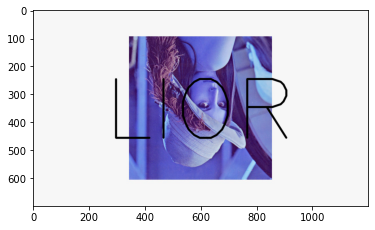

In [16]:
# ## direct python call
sample_image_path = "Backchannel-Lena-Soderberg-FA.jpg"
direct_call_img = flipper.flip_cli(sample_image_path, return_img=True)
_render_(direct_call_img)


2021-09-24 09:34:16.103 | INFO     | __main__:flip_cli:39 - loaded=Backchannel-Lena-Soderberg-FA.jpg


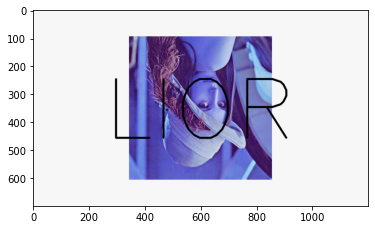

In [17]:
# ## explicit bash call
! python liorboot/flipper.py \
  Backchannel-Lena-Soderberg-FA.jpg \
  --dest-path "Backchannel-Lena-Soderberg-FA.jpg.bash_cli_img._out.jpg"

bash_cli_img = cv2.imread("Backchannel-Lena-Soderberg-FA.jpg.bash_cli_img._out.jpg")
_render_(bash_cli_img)


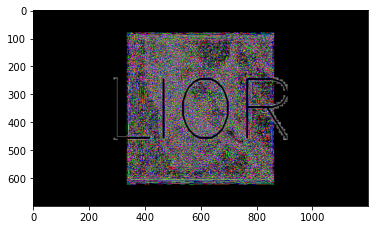

In [18]:
approaches_bash_direct_diff = bash_cli_img - direct_call_img
_render_(approaches_bash_direct_diff)

task: [run-sample] python liorboot/flipper.py \
  Backchannel-Lena-Soderberg-FA.jpg \
  --dest-path Backchannel-Lena-Soderberg-FA.jpg.run-sample._out.jpg
2021-09-24 09:34:17.484 | INFO     | __main__:flip_cli:39 - loaded=Backchannel-Lena-Soderberg-FA.jpg
task: [run-sample] echo .@@output_img_path=Backchannel-Lena-Soderberg-FA.jpg.run-sample._out.jpg
.@@output_img_path=Backchannel-Lena-Soderberg-FA.jpg.run-sample._out.jpg
Backchannel-Lena-Soderberg-FA.jpg.run-sample._out.jpg
resloved run-sample dest name: Backchannel-Lena-Soderberg-FA.jpg.run-sample._out.jpg


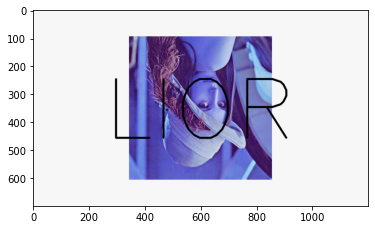

In [19]:
# ## implicit bash call with task semantics
! task run-sample
! echo $(yq read Taskfile.yml tasks.run-sample.vars.output_img_path)

# get output filename from task
taskfile = yaml.safe_load(open('Taskfile.yml', 'r'))
task_run_sample_img_path = taskfile['tasks']['run-sample']['vars']['output_img_path']
print(f"resloved run-sample dest name: {task_run_sample_img_path}")
task_run_sample_img = cv2.imread(task_run_sample_img_path)
_render_(task_run_sample_img)


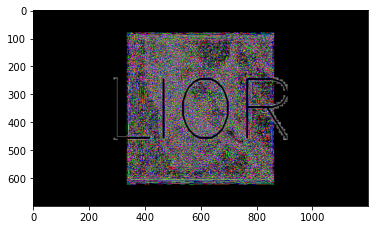

In [20]:
approaches_task_direct_diff = task_run_sample_img - direct_call_img
_render_(approaches_task_direct_diff)